# Example: Neural Network for Binary Classification

*An Introduction to Artificial Neural Network, 10 Aug 2024. Kunpeng Yao.*

### The XOR problem
The XOR function, or exclusive OR, is a logical operation that outputs true (or 1) if and only if the inputs differ (i.e., one is true and the other is false). For binary inputs, the XOR function is defined as follows:

#### XOR Truth Table
| Input 1 | Input 2 | XOR Output |
|---------|---------|------------|
|    0    |    0    |      0     |
|    0    |    1    |      1     |
|    1    |    0    |      1     |
|    1    |    1    |      0     |

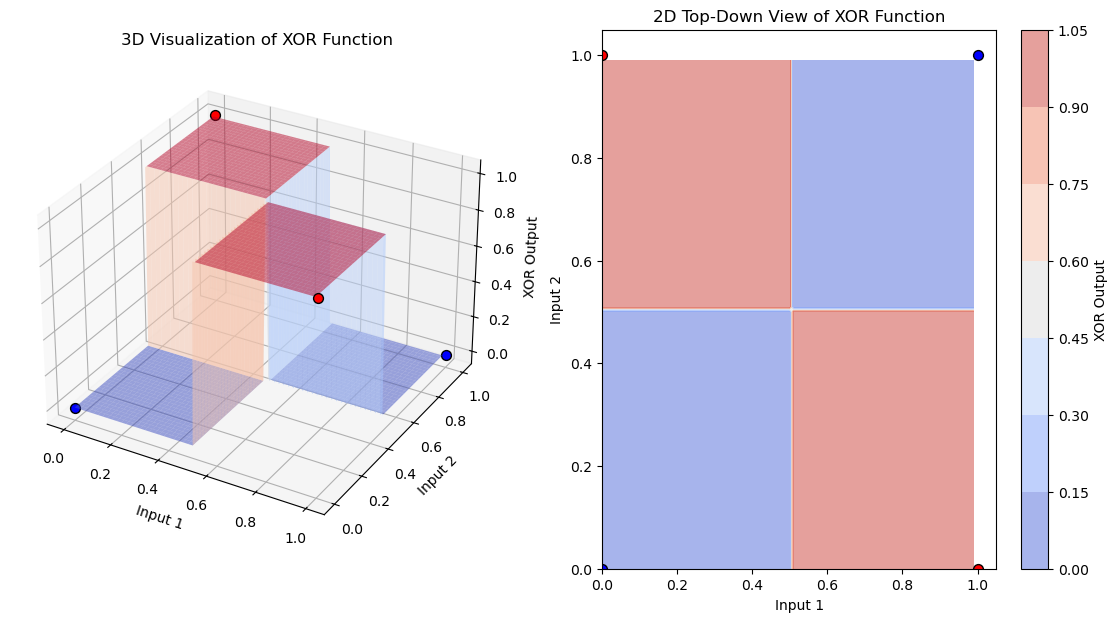

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Import the toolbox
from toolbox import *

# Plot the 3D and 2D visualization of the XOR function
plot_3d_xor()

### Step 1: Implementation of the Neural Network Class

In [2]:
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.1):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        
        # [Step 1] Initialize weights and biases
        self.weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
        self.biases = [np.random.randn(size) for size in layer_sizes[1:]]

    # Activation function and its derivative
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        sigmoid = self._sigmoid(x)
        return sigmoid * (1 - sigmoid)

    # Compute gradients and update parameters
    def _compute_gradients(self, input_vector, target):
        # [Step 2] Forward pass
        activations = [input_vector] # this is "a[0]"
        zs = []
        activation = input_vector
        for weight, bias in zip(self.weights, self.biases):
            z = np.dot(activation, weight) + bias
            zs.append(z)
            activation = self._sigmoid(z)
            activations.append(activation)
        
        # [Step 3] Loss function and its derivative
        # loss = 0.5 * np.square(activations[-1] - target)
        loss_gradient = activations[-1] - target

        # [Step 4] Backward pass
        delta = loss_gradient * self._sigmoid_derivative(zs[-1])
        gradient_b = [delta] # gradients with respect to biases
        gradient_w = [np.outer(activations[-2], delta)] # gradients with respect to weights

        for l in range(2, len(self.layer_sizes)):
            z = zs[-l]
            sp = self._sigmoid_derivative(z)
            delta = np.dot(delta, self.weights[-l + 1].T) * sp
            gradient_b.append(delta)
            gradient_w.append(np.outer(activations[-l - 1], delta))
        
        gradient_b.reverse() # reverse the order of the gradients, because we started from the last layer
        gradient_w.reverse()
        
        return gradient_b, gradient_w

    # Gradient descent step
    def _update_parameters(self, gradient_b, gradient_w):
        # [Step 5] Update weights and biases
        self.biases = [b - self.learning_rate * nb for b, nb in zip(self.biases, gradient_b)]
        self.weights = [w - self.learning_rate * nw for w, nw in zip(self.weights, gradient_w)]

    # Train the network
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        
        # [Step 6] Iteration
        for iteration in range(iterations):
            # Pick a random data instance
            random_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[random_index]
            target = targets[random_index]

            # Compute gradients and update parameters
            gradient_b, gradient_w = self._compute_gradients(input_vector, target)
            self._update_parameters(gradient_b, gradient_w)

            # Measure cumulative error every 100 iterations
            if iteration % 100 == 0:
                cumulative_error = 0
                for i in range(len(input_vectors)):
                    prediction = self.predict(input_vectors[i])
                    error = np.square(prediction - targets[i]) # Loss for each neuron
                    cumulative_error += error
                cumulative_errors.append(cumulative_error)
        return cumulative_errors

    # TO use the trained network to predict the output of a new input vector
    def predict(self, input_vector):
        # Forward pass
        activation = input_vector
        for weight, bias in zip(self.weights, self.biases):
            activation = self._sigmoid(np.dot(activation, weight) + bias)
        return activation

### Initializing a Neural Network

In [3]:
# Example usage:
layer_sizes = [2, 3, 5, 1]  # Input layer: 2 neurons, Hidden layers: 5 neurons, Output layer: 1 neuron

# Create the neural network
nn = NeuralNetwork(layer_sizes)

### Visualize the NN Structure

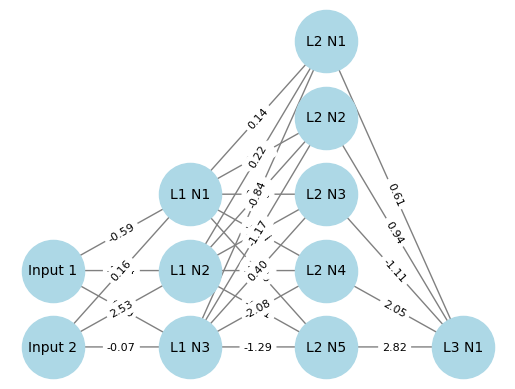

In [4]:
# Visualize the neural network structure
visualize_nn(nn)

### Training the Neural Network

In [19]:
# Training data (from the XOR truth table)
# input_vectors = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# targets = np.array([0, 1, 1, 0])

N = 10
input_vectors = np.random.rand(N, 2)  # Random floats between 0 and 2
targets = np.array([(1 if x[0] > 0.5 else 0) ^ (1 if x[1] > 0.5 else 0) for x in input_vectors]) # XOR function

# Train the neural network
iterations = 80000
nn.learning_rate = 0.5
errors = nn.train(input_vectors, targets, iterations)

# Print the final output
# for input_vector, target in zip(input_vectors,targets):
    # print(f"Input: {input_vector} Output: {nn.predict(input_vector)} Target: {target}")

### Visualize the training error

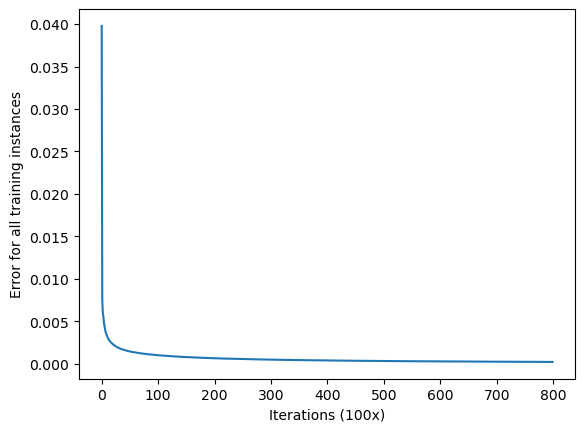

In [20]:
plt.plot(errors)
plt.xlabel("Iterations (100x)")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

# Testing the trained NN

In [21]:
# Manual testing data (different from training data, but for demonstration we'll use the same XOR inputs)
'''
test_input_vectors = np.array([[0.2, 0.3], [0.1, 0.9], [0.8, 0.1], [0.9, 1.1], [1.1, 0.4]])
test_targets = np.array([0, 1, 1, 0, 1])

# Test the trained neural network
print("Testing the trained neural network:")
for input_vector, target in zip(test_input_vectors, test_targets):
    output = nn.predict(input_vector)
    print(f"Input: {input_vector}, Predicted Output: {output}, Target: {target}")
'''

'\ntest_input_vectors = np.array([[0.2, 0.3], [0.1, 0.9], [0.8, 0.1], [0.9, 1.1], [1.1, 0.4]])\ntest_targets = np.array([0, 1, 1, 0, 1])\n\n# Test the trained neural network\nprint("Testing the trained neural network:")\nfor input_vector, target in zip(test_input_vectors, test_targets):\n    output = nn.predict(input_vector)\n    print(f"Input: {input_vector}, Predicted Output: {output}, Target: {target}")\n'

## A Systematic Evaluation of the NN 

In [25]:
# Evaluate the performance of the trained neural network with N testing samples
N = 1000
success_rate, test_input_vectors, test_targets = evaluate_performance(nn, N)

Success Rate: 91.60%


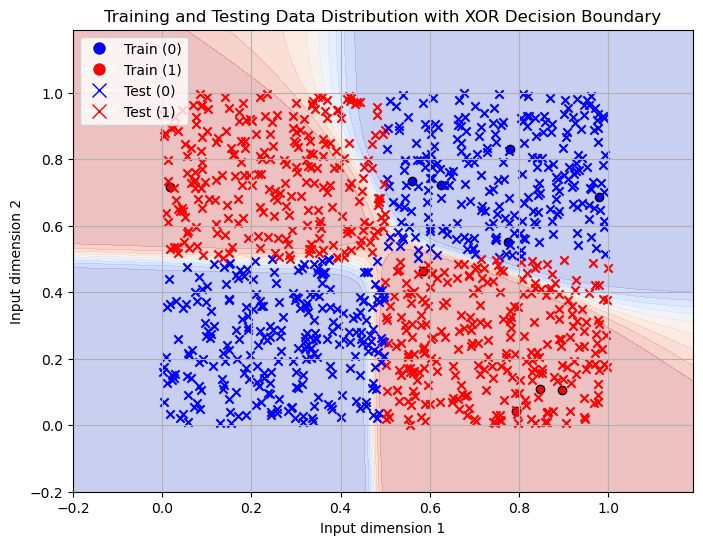

In [26]:
# Visualize the training and testing data
visualize_data(input_vectors, test_input_vectors, targets, test_targets, nn)

### Visualize of the Ideal XOR Plane

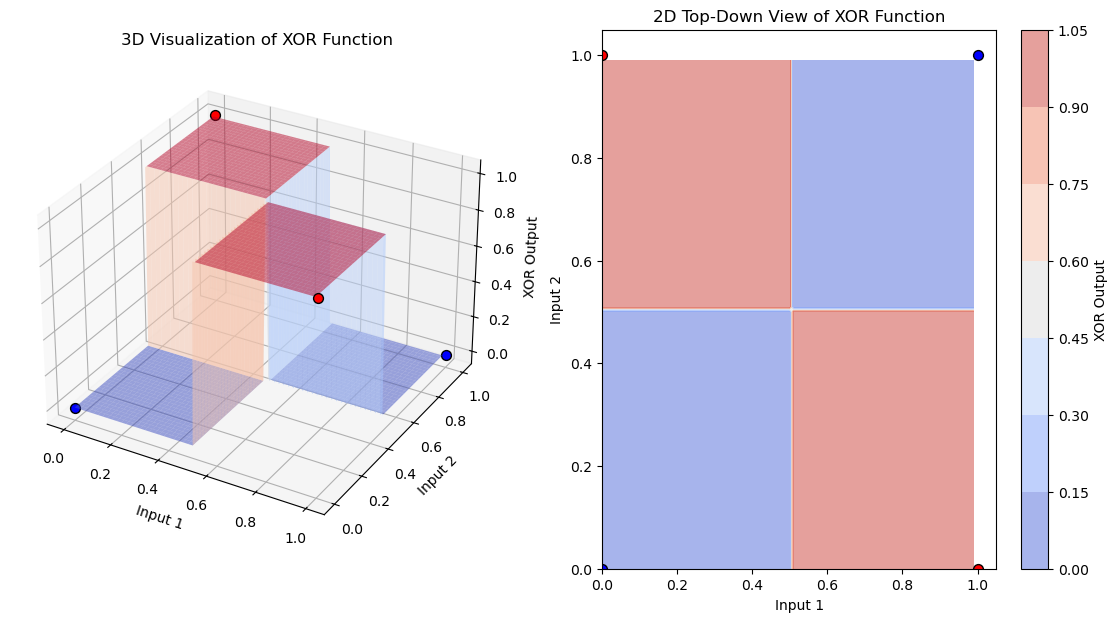

In [27]:
plot_3d_xor()